In [1]:
import numpy as np
import networkx as nx
import os
from random import shuffle          # importamos las librerias necesarias
import matplotlib.pylab as plt       
%matplotlib inline
from matplotlib.pyplot import title,xlabel,ylabel,show

In [2]:
G = nx.read_gml('dolphins.gml') # definimos la red:cada nodo es un delfin y cada conexion representa una interaccion

In [3]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

dolphinsGender=ldata('dolphinsGender.txt') # usamos la funcion "ldata" para abrir el archivo .txt 

In [4]:
dict_gender = {dolphin_nombre : genero for dolphin_nombre, genero  in dolphinsGender}
def AssignGender(G,dict_gender):
    for n in G.nodes:
        G.nodes[n]["gender"] = dict_gender[n]
    return
 
AssignGender(G,dict_gender)

In [5]:
dict(G.nodes('gender'))

{'Beak': 'm',
 'Beescratch': 'm',
 'Bumper': 'm',
 'CCL': 'f',
 'Cross': 'm',
 'DN16': 'f',
 'DN21': 'm',
 'DN63': 'm',
 'Double': 'f',
 'Feather': 'm',
 'Fish': 'f',
 'Five': 'f',
 'Fork': 'm',
 'Gallatin': 'm',
 'Grin': 'm',
 'Haecksel': 'm',
 'Hook': 'f',
 'Jet': 'm',
 'Jonah': 'm',
 'Knit': 'm',
 'Kringel': 'f',
 'MN105': 'm',
 'MN23': 'm',
 'MN60': 'm',
 'MN83': 'm',
 'Mus': 'm',
 'Notch': 'm',
 'Number1': 'm',
 'Oscar': 'm',
 'Patchback': 'm',
 'PL': 'm',
 'Quasi': 'm',
 'Ripplefluke': 'NA',
 'Scabs': 'f',
 'Shmuddel': 'f',
 'SMN5': 'm',
 'SN100': 'f',
 'SN4': 'f',
 'SN63': 'f',
 'SN89': 'f',
 'SN9': 'f',
 'SN90': 'm',
 'SN96': 'm',
 'Stripes': 'f',
 'Thumper': 'm',
 'Topless': 'm',
 'TR120': 'f',
 'TR77': 'f',
 'TR82': 'NA',
 'TR88': 'f',
 'TR99': 'f',
 'Trigger': 'f',
 'TSN103': 'f',
 'TSN83': 'NA',
 'Upbang': 'm',
 'Vau': 'f',
 'Wave': 'f',
 'Web': 'm',
 'Whitetip': 'f',
 'Zap': 'NA',
 'Zig': 'm',
 'Zipfel': 'm'}

In [8]:
dict_com_info={'Beak': 3,
 'Beescratch': 0,
 'Bumper': 3,
 'CCL': 4,
 'Cross': 2,
 'DN16': 0,
 'DN21': 0,
 'DN63': 0,
 'Double': 4,
 'Feather': 0,
 'Fish': 3,
 'Five': 2,
 'Fork': 1,
 'Gallatin': 0,
 'Grin': 1,
 'Haecksel': 2,
 'Hook': 1,
 'Jet': 0,
 'Jonah': 2,
 'Knit': 0,
 'Kringel': 1,
 'MN105': 2,
 'MN23': 0,
 'MN60': 2,
 'MN83': 2,
 'Mus': 0,
 'Notch': 0,
 'Number1': 0,
 'Oscar': 3,
 'PL': 3,
 'Patchback': 2,
 'Quasi': 0,
 'Ripplefluke': 0,
 'SMN5': 2,
 'SN100': 4,
 'SN4': 1,
 'SN63': 1,
 'SN89': 4,
 'SN9': 1,
 'SN90': 0,
 'SN96': 3,
 'Scabs': 1,
 'Shmuddel': 1,
 'Stripes': 1,
 'TR120': 1,
 'TR77': 3,
 'TR82': 0,
 'TR88': 1,
 'TR99': 1,
 'TSN103': 1,
 'TSN83': 1,
 'Thumper': 1,
 'Topless': 2,
 'Trigger': 2,
 'Upbang': 0,
 'Vau': 2,
 'Wave': 0,
 'Web': 0,
 'Whitetip': 1,
 'Zap': 4,
 'Zig': 0,
 'Zipfel': 1}

In [9]:
for n in G.nodes:
    G.nodes[n]["community"] = dict_com_info[n] 

CALCULO PORCENTAJE DE CADA SEXO EN MIS COMUNIDADES ORIGINALES

In [11]:
females=np.zeros((1,5))
males=np.zeros((1,5))
notass=np.zeros((1,5))
for nodo in G.nodes:
    com=G.nodes('community')[nodo]
    if G.nodes('gender')[nodo]=='f':
        females[0,com]=females[0,com]+1
    elif G.nodes('gender')[nodo]=='m':
        males[0,com]=males[0,com]+1
    else:
        notass[0,com]=notass[0,com]+1
FractionFemales=females/sum(sum(females,males),notass)
FractionMales=males/sum(sum(females,males),notass)
FractionNotAssigned=notass/sum(sum(females,males),notass)

In [12]:
FractionFemales,FractionMales,FractionNotAssigned

(array([[0.1       , 0.72222222, 0.25      , 0.28571429, 0.8       ]]),
 array([[0.8       , 0.22222222, 0.75      , 0.71428571, 0.        ]]),
 array([[0.1       , 0.05555556, 0.        , 0.        , 0.2       ]]))

HAGO 'SHUFFLES' DE SEXOS Y CALCULO NUEVAMENTE PORCENTAJE DE SEXOS POR COMUNIDADES

In [13]:
def BreakFieldAttribution(fieldAtributtion):              
    names = [nodes for nodes,field in fieldAtributtion]  # funcion para separar los keys y los values 
    field = [field for nodes,field in fieldAtributtion]  #          en un diccionario
    return names,field

names = BreakFieldAttribution(dolphinsGender)[0]     # genero una lista con los nombres de los delfines
genders = BreakFieldAttribution(dolphinsGender)[1] 

In [15]:
H = nx.read_gml('dolphins.gml')                      # trabajamos sobre H (grafo nuevo)
for n in H.nodes:
    H.nodes[n]["community"] = dict_com_info[n] 

FracFemales=[]
FracMales=[]
FracNotAss=[]

it=10000
for j in range(it):
    np.random.shuffle(genders)                       # reordeno al azar la lista de generos
    dict_gender_together = dict(zip(names,genders))  # genero un diccionario nuevo {delfines: generos reordenados} 
    AssignGender(H,dict_gender_together)             # Asigno el genero correspondiente a cada nodo de H 
    
    fem=np.zeros((1,5))
    mal=np.zeros((1,5))
    nota=np.zeros((1,5))
    for nodo in H.nodes:
        com=H.nodes('community')[nodo]
        if H.nodes('gender')[nodo]=='f':
            fem[0,com]=fem[0,com]+1
        elif H.nodes('gender')[nodo]=='m':
            mal[0,com]=mal[0,com]+1
        else:
            nota[0,com]=nota[0,com]+1
    FracFemales.append(fem/sum(sum(fem,mal),nota))
    FracMales.append(mal/sum(sum(fem,mal),nota))
    FracNotAss.append(nota/sum(sum(fem,mal),nota))

HISTOGRAMA COMUNIDAD 0

In [17]:
MUJERES=[]
VARONES=[]
for j in range(5):
    fraccionmujeres=[]
    fraccionhombres=[]
    for i in range(it):
        fraccionhombres.append(FracMales[i][0,0])
        fraccionmujeres.append(FracFemales[i][0,0])
    MUJERES.append(fraccionmujeres)
    VARONES.append(fraccionhombres)

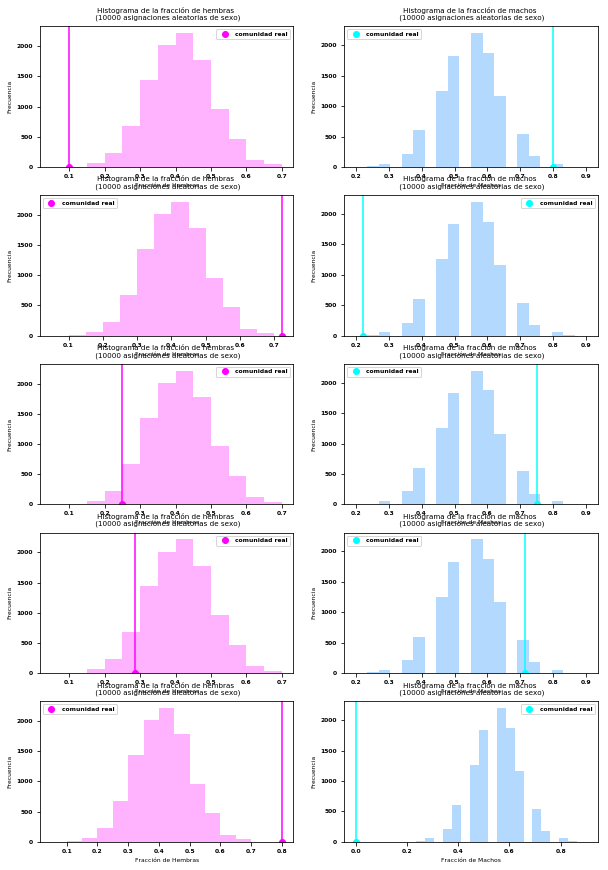

In [18]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 6}

plt.rc('font', **font)
plt.figure(figsize=(10,15))

plt.subplot(5,2,1)
plt.hist(MUJERES[0],bins=13,color=[1, 0.7, 1])
plt.axvline(FractionFemales[0,0], c='magenta')
plt.plot(FractionFemales[0,0],1,'o',label='comunidad real',c='magenta')
plt.title("Histograma de la fracción de hembras \n (%i asignaciones aleatorias de sexo)" %it)
plt.xlabel("Fracción de Hembras")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(5,2,2)
plt.hist(VARONES[0],bins=20,color=[0.7, 0.85, 1])
plt.axvline(FractionMales[0,0], c='cyan')
plt.plot(FractionMales[0,0],1,'o',label='comunidad real',c='cyan')
plt.title("Histograma de la fracción de machos \n (%i asignaciones aleatorias de sexo)" %it)
plt.xlabel("Fracción de Machos")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(5,2,3)
plt.hist(MUJERES[1],bins=13,color=[1, 0.7, 1])
plt.axvline(FractionFemales[0,1], c='magenta')
plt.plot(FractionFemales[0,1],1,'o',label='comunidad real',c='magenta')
plt.title("Histograma de la fracción de hembras \n (%i asignaciones aleatorias de sexo)" %it)
plt.xlabel("Fracción de Hembras")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(5,2,4)
plt.hist(VARONES[1],bins=20,color=[0.7, 0.85, 1])
plt.axvline(FractionMales[0,1], c='cyan')
plt.plot(FractionMales[0,1],1,'o',label='comunidad real',c='cyan')
plt.title("Histograma de la fracción de machos \n (%i asignaciones aleatorias de sexo)" %it)
plt.xlabel("Fracción de Machos")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(5,2,5)
plt.hist(MUJERES[2],bins=13,color=[1, 0.7, 1])
plt.axvline(FractionFemales[0,2], c='magenta')
plt.plot(FractionFemales[0,2],1,'o',label='comunidad real',c='magenta')
plt.title("Histograma de la fracción de hembras \n (%i asignaciones aleatorias de sexo)" %it)
plt.xlabel("Fracción de Hembras")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(5,2,6)
plt.hist(VARONES[2],bins=20,color=[0.7, 0.85, 1])
plt.axvline(FractionMales[0,2], c='cyan')
plt.plot(FractionMales[0,2],1,'o',label='comunidad real',c='cyan')
plt.title("Histograma de la fracción de machos \n (%i asignaciones aleatorias de sexo)" %it)
plt.xlabel("Fracción de Machos")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(5,2,7)
plt.hist(MUJERES[3],bins=13,color=[1, 0.7, 1])
plt.axvline(FractionFemales[0,3], c='magenta')
plt.plot(FractionFemales[0,3],1,'o',label='comunidad real',c='magenta')
plt.title("Histograma de la fracción de hembras \n (%i asignaciones aleatorias de sexo)" %it)
plt.xlabel("Fracción de Hembras")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(5,2,8)
plt.hist(VARONES[3],bins=20,color=[0.7, 0.85, 1])
plt.axvline(FractionMales[0,3], c='cyan')
plt.plot(FractionMales[0,3],1,'o',label='comunidad real',c='cyan')
plt.title("Histograma de la fracción de machos \n (%i asignaciones aleatorias de sexo)" %it)
plt.xlabel("Fracción de Machos")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(5,2,9)
plt.hist(MUJERES[4],bins=13,color=[1, 0.7, 1])
plt.axvline(FractionFemales[0,4], c='magenta')
plt.plot(FractionFemales[0,4],1,'o',label='comunidad real',c='magenta')
plt.title("Histograma de la fracción de hembras \n (%i asignaciones aleatorias de sexo)" %it)
plt.xlabel("Fracción de Hembras")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(5,2,10)
plt.hist(VARONES[4],bins=20,color=[0.7, 0.85, 1])
plt.axvline(FractionMales[0,4], c='cyan')
plt.plot(FractionMales[0,4],1,'o',label='comunidad real',c='cyan')
plt.title("Histograma de la fracción de machos \n (%i asignaciones aleatorias de sexo)" %it)
plt.xlabel("Fracción de Machos")
plt.ylabel("Frecuencia")
plt.legend()

show()